<a href="https://colab.research.google.com/github/lucianawaka/bootcamp-ML/blob/main/1_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bootcamp de Machine Learning**

## **Introdução ao Machine Learning e Regressão Linear**

### **Professores do Bootcamp:**

##### [Odemir Depieri Jr](https://www.linkedin.com/in/odemir-depieri-jr/)

Tech Lead no Banco Itaú

##### [Ronisson Lucas Calmon da Conceição](https://www.linkedin.com/in/ronisson-lucas-calmon-da-concei%C3%A7%C3%A3o-7aa884202/)

Cientista de Dados no Banco Original


##### [Nelson Jacob Dressler](https://www.linkedin.com/in/nelsondressler/)

Atuou como Cientista de Dados em empresas como SMi Engenharia e Deloitte


In [109]:
# imports
# manipulação de dados
import pandas as pd
import numpy as np

# visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# configuração de warnings
import warnings
warnings.filterwarnings('ignore')

In [56]:
# leitura da base
df = pd.read_csv('Walmart.csv')

In [57]:
# inspeção da base
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [58]:
# dtype de cada coluna
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [59]:
# converte a coluna Date para o formato datetime
df['Date'] = pd.to_datetime(df.Date, format='%d-%m-%Y')

In [60]:
# ordena a base de dados pelas colunas de Data e Vendas
df = (
    df
     .sort_values(
        by=['Date', 'Weekly_Sales'],
        ascending=True)
     .reset_index(drop=True)
)

In [61]:
# verifica missing values
# conclusão: não há missing values
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [62]:
# verifica linhas duplicadas
# conclusão: não há linhas duplicadas
df.duplicated().sum()

0

0

In [63]:
# quantidade de valores únicos em cada coluna
# Conclusões:
# 1. Holiday_Flag de fato é uma dummy
# 2. Temos 45 lojas
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

Holiday_Flag       2
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [64]:
# sumário estatístico
# conclusão: não identificamos nenhuma variável inconsistente (venda negativa, por exemplo)
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [65]:
# cria colunas a partir da data
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

In [66]:
# no homework teste as seguintes possibilidades:
#df['dayofweek'] = df.Date.dt.dayofweek
#df['day_name'] = df.Date.dt.day_name()
#df['is_month_start'] = df.Date.dt.is_month_start.map({True:1, False:0})
#df['is_month_end'] = df.Date.dt.is_month_end.map({True:1, False:0})
#df['days_in_month'] = df.Date.dt.days_in_month
#df['is_quarter_start'] = df.Date.dt.is_quarter_start.map({True:1, False:0})
#df['is_quarter_end'] = df.Date.dt.is_quarter_end.map({True:1, False:0})
#df['day'] = df.Date.dt.day

Análise Exploratória de Dados

Nesta etapa estamos interessados em compreender melhor os dados por meio de técnicas de visualização de dados.

In [67]:
# cria um data frame mensal (aplicando-se média)
month_data = df.set_index('Date')\
    .resample('m')[['Weekly_Sales', 'CPI', 'Unemployment']]\
    .mean()

In [68]:
month_data.head()

,Weekly_Sales,CPI,Unemployment
Date,,,
2010-02-28,1.057405e+06,167.834459,8.619311
2010-03-31,1.010666e+06,167.930846,8.619311
2010-04-30,1.028499e+06,167.678437,8.497711
2010-05-31,1.037283e+06,167.641758,8.497711
2010-06-30,1.068034e+06,168.004688,8.497711


,Weekly_Sales,CPI,Unemployment
Date,,,
2010-02-28,1.057405e+06,167.834459,8.619311
2010-03-31,1.010666e+06,167.930846,8.619311
2010-04-30,1.028499e+06,167.678437,8.497711
2010-05-31,1.037283e+06,167.641758,8.497711
2010-06-30,1.068034e+06,168.004688,8.497711


* Evolução das vendas e outras variáveis no tempo

In [69]:
# cria figura e eixo
def plot_line_month_data(feature, title, ylabel):
    fig, ax = plt.subplots(figsize=(10, 4))
    # cálculo das vendas médias mensais
    month_data[feature].plot(ax=ax, color='black', linewidth=2)
    # labels
    # título
    plt.title(title, fontweight='bold', pad=15)
    # rótulo do eixo x
    plt.xlabel('')
    # rótulo do eixo y
    plt.ylabel(ylabel)
    # oculta spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

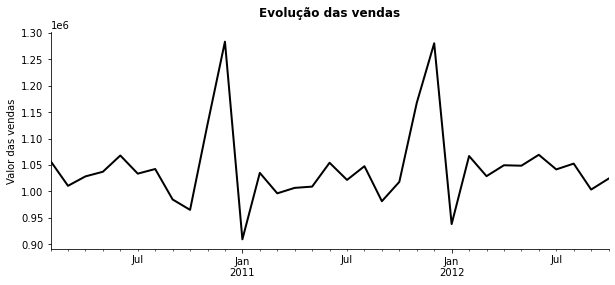

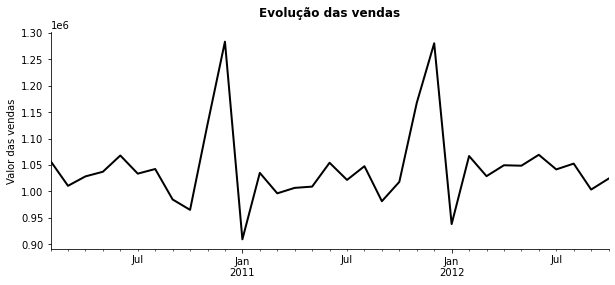

In [70]:
plot_line_month_data(
    'Weekly_Sales', 
    'Evolução das vendas', 
    'Valor das vendas'
)

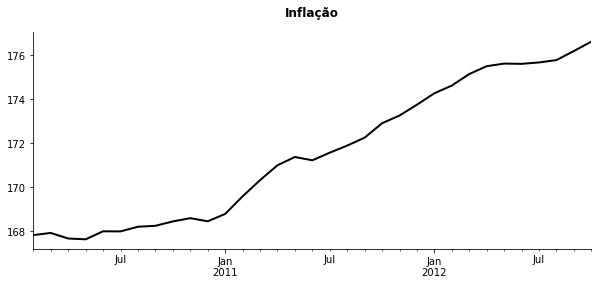

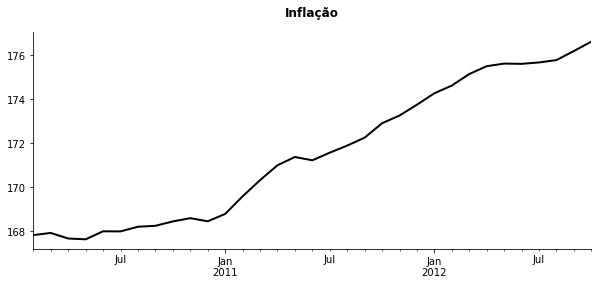

In [71]:
plot_line_month_data(
    'CPI', 
    'Inflação', 
    ''
)

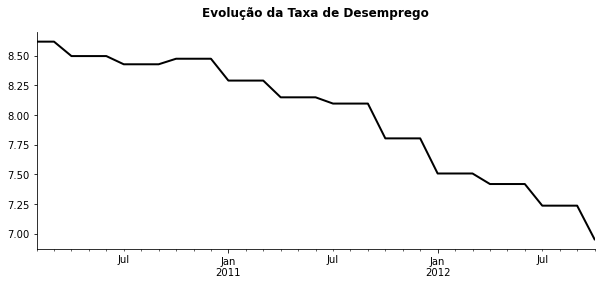

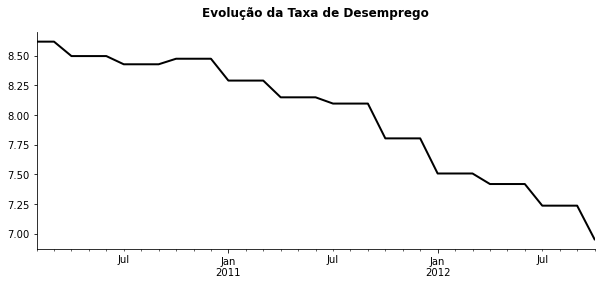

In [72]:
plot_line_month_data(
    'Unemployment', 
    'Evolução da Taxa de Desemprego', 
    ''
)

In [73]:
def plot_two_axes(variavel_eixo_1, variavel_eixo_2, title):
    # cria figura e eixo
    fig, ax1 = plt.subplots(figsize=(8, 5))
    # título
    fig.suptitle(title, fontweight='bold')
    # eixo 1
    month_data[variavel_eixo_1].plot(ax=ax1, color='black', linewidth=2)
    ax1.set_ylabel(variavel_eixo_1)

    # cria segundo eixo
    ax2 = ax1.twinx()
    month_data[variavel_eixo_2].plot(ax=ax2, color='lightgray', linewidth=2)
    ax2.set_ylabel(variavel_eixo_2)
    
    # adiciona legenda
    fig.legend()
    plt.show()

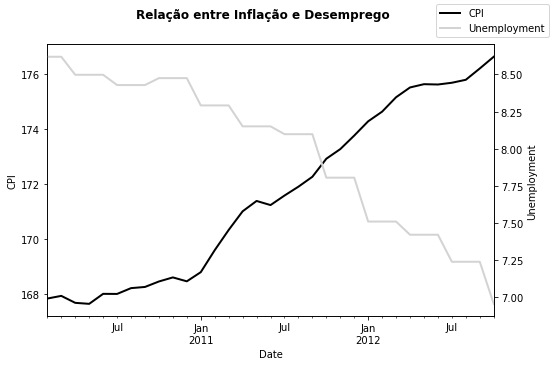

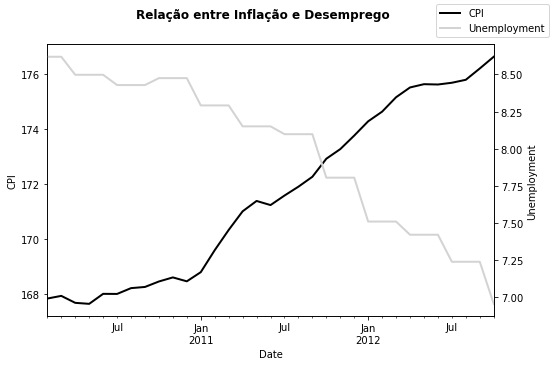

In [74]:
plot_two_axes(
    'CPI', 
    'Unemployment', 
    'Relação entre Inflação e Desemprego'
)

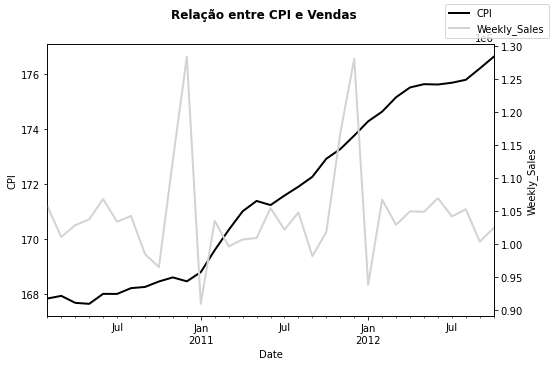

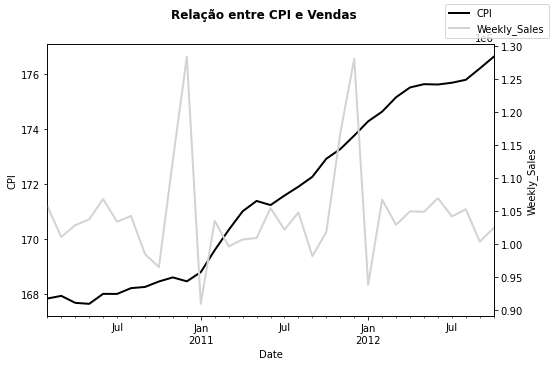

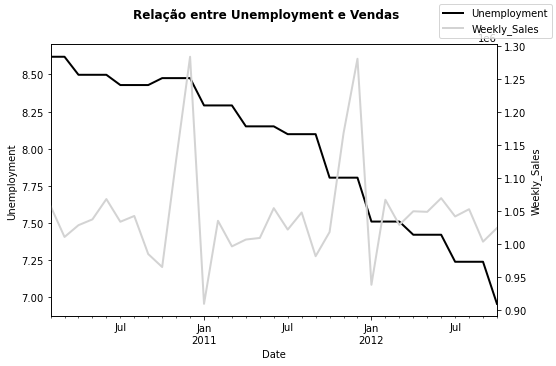

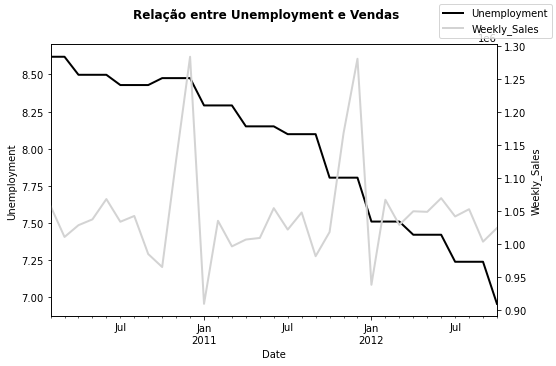

In [75]:
for feature in ['CPI', 'Unemployment']:
    plot_two_axes(
        feature,
        'Weekly_Sales',
        f'Relação entre {feature} e Vendas'
    )

* Análise estatística

In [76]:
# lista com colunas numéricas
num_cols = df.select_dtypes(include='number').columns.tolist()

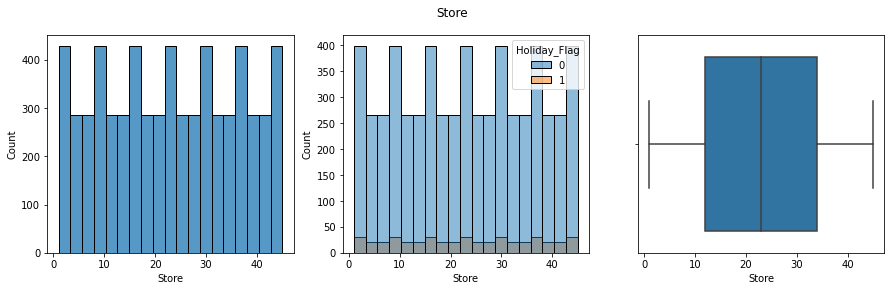

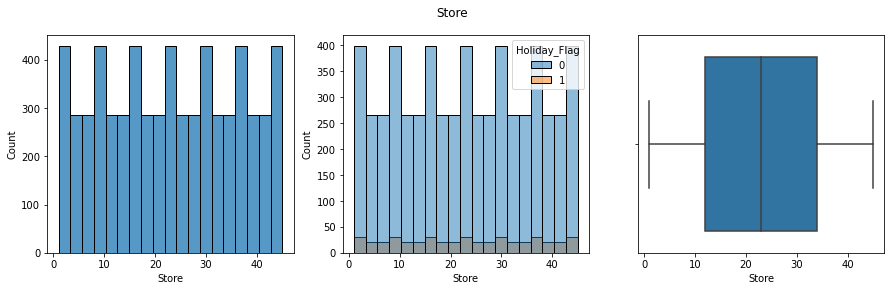

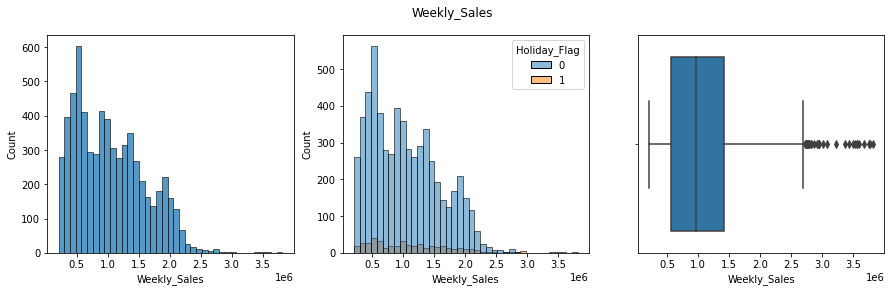

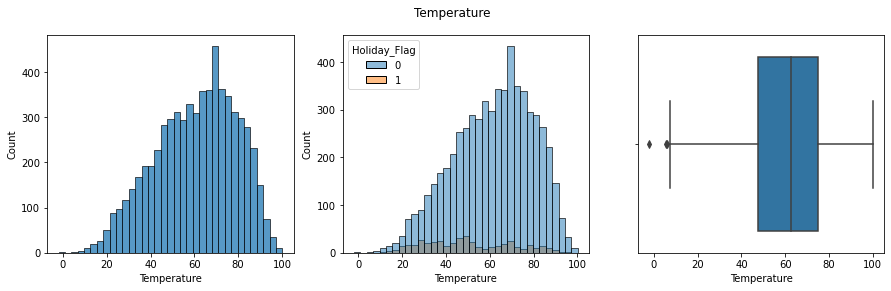

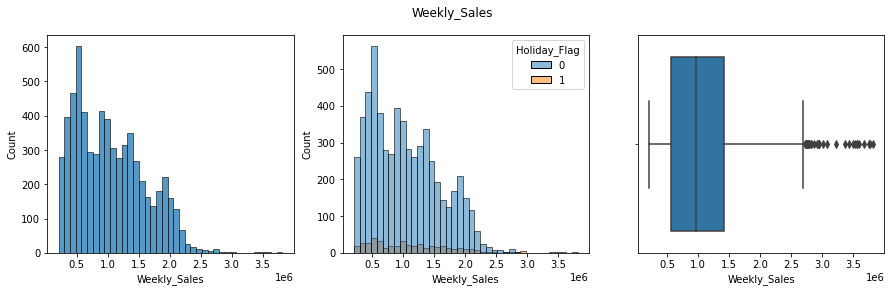

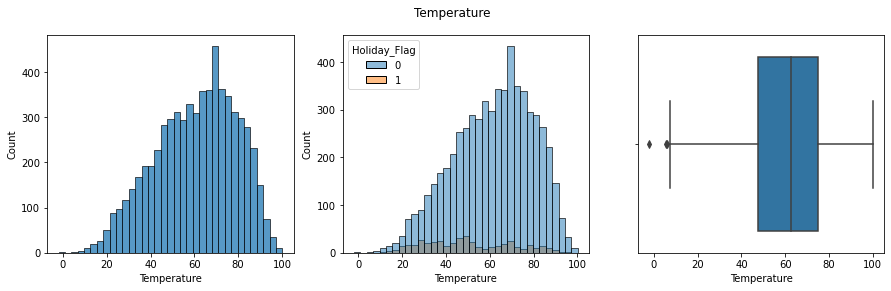

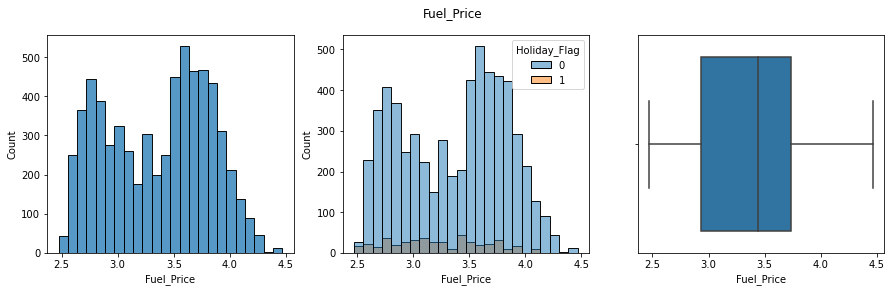

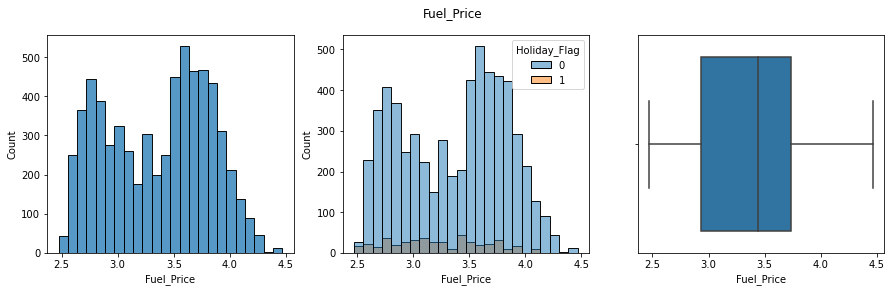

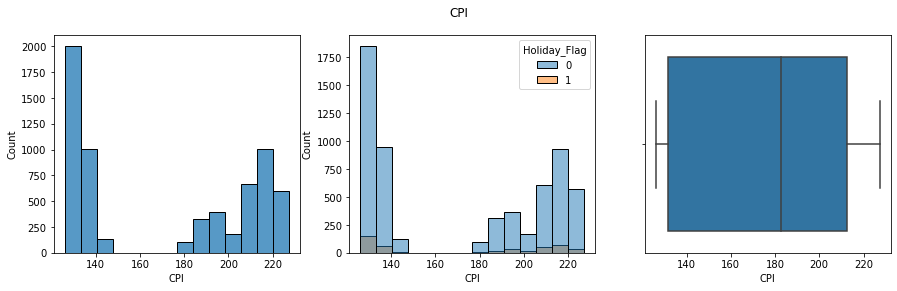

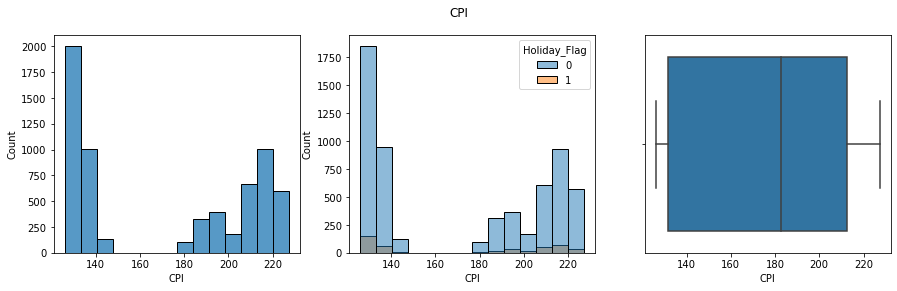

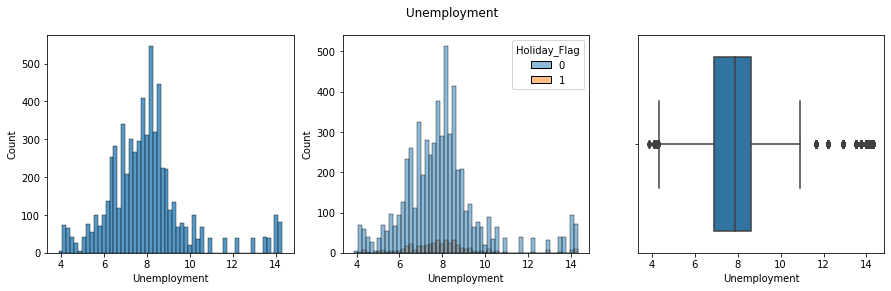

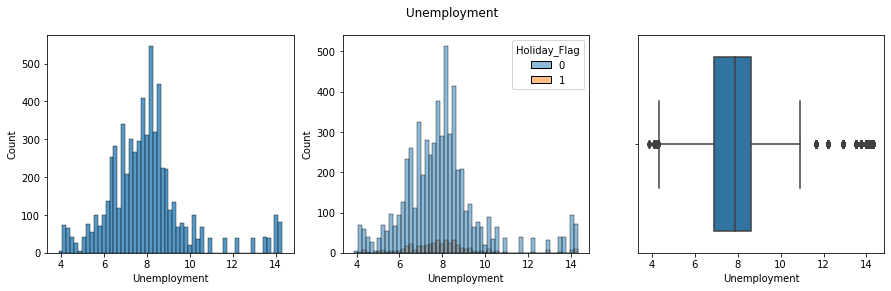

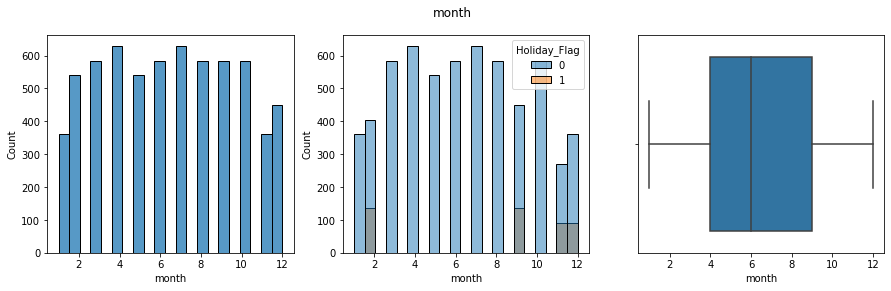

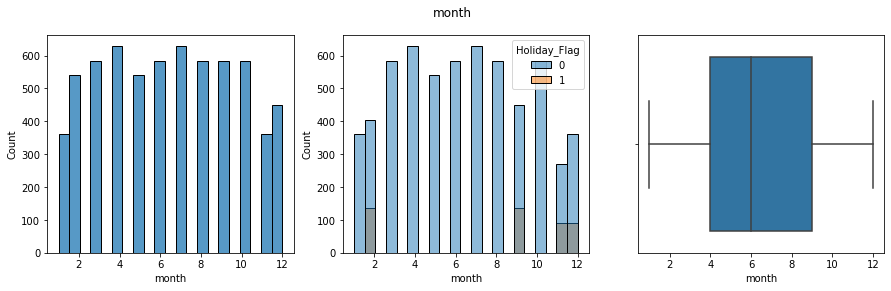

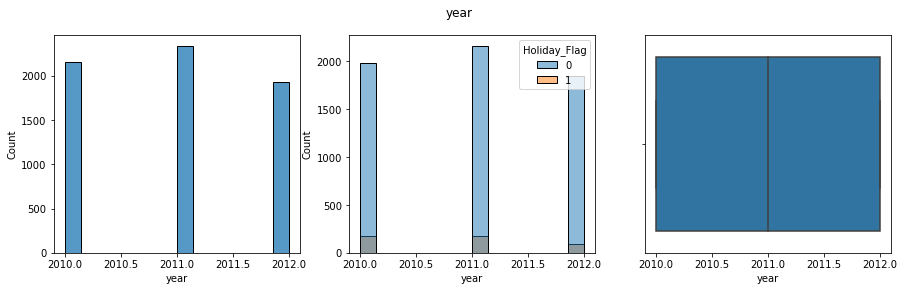

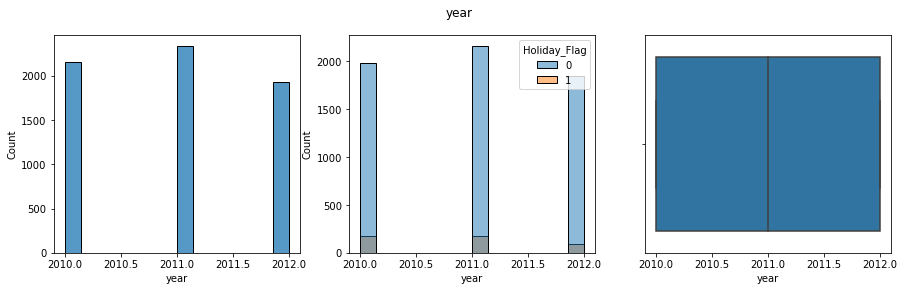

In [77]:
for feature in num_cols:
    #  se a variável for igual a 'Holiday_Flag' pula o laço
    if feature == 'Holiday_Flag':
        continue
    # cria figura e eixo
    fig, ax = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle(feature)
    # histograma
    sns.histplot(df[feature], ax=ax[0])
    sns.histplot(x=feature, ax=ax[1], data=df, hue='Holiday_Flag')
    # boxplot
    sns.boxplot(df[feature], orient='h', ax=ax[2])
    plt.show()

In [78]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'month', 'year'],
      dtype='object')

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'month', 'year'],
      dtype='object')

In [79]:
df['CPI'].median()

182.6165205

182.6165205

In [80]:
df[df['Weekly_Sales']>1000000]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
20,40,2010-02-05,1001943.80,0,14.48,2.788,131.527903,5.892,2,2010
21,8,2010-02-05,1004137.09,0,34.14,2.572,214.471451,6.299,2,2010
22,22,2010-02-05,1033017.37,0,24.36,2.788,135.352461,8.283,2,2010
23,26,2010-02-05,1034119.21,0,9.55,2.788,131.527903,8.488,2,2010
24,41,2010-02-05,1086533.18,0,30.27,2.580,189.381697,7.541,2,2010
...,...,...,...,...,...,...,...,...,...,...
6430,10,2012-10-26,1744349.05,0,70.50,4.301,131.193097,6.943,10,2012
6431,2,2012-10-26,1834458.35,0,69.79,3.506,223.078337,6.170,10,2012
6432,20,2012-10-26,2031650.55,0,60.04,3.882,216.151590,7.293,10,2012
6433,13,2012-10-26,2035189.66,0,46.97,3.755,131.193097,5.621,10,2012


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
20,40,2010-02-05,1001943.80,0,14.48,2.788,131.527903,5.892,2,2010
21,8,2010-02-05,1004137.09,0,34.14,2.572,214.471451,6.299,2,2010
22,22,2010-02-05,1033017.37,0,24.36,2.788,135.352461,8.283,2,2010
23,26,2010-02-05,1034119.21,0,9.55,2.788,131.527903,8.488,2,2010
24,41,2010-02-05,1086533.18,0,30.27,2.580,189.381697,7.541,2,2010
...,...,...,...,...,...,...,...,...,...,...
6430,10,2012-10-26,1744349.05,0,70.50,4.301,131.193097,6.943,10,2012
6431,2,2012-10-26,1834458.35,0,69.79,3.506,223.078337,6.170,10,2012
6432,20,2012-10-26,2031650.55,0,60.04,3.882,216.151590,7.293,10,2012
6433,13,2012-10-26,2035189.66,0,46.97,3.755,131.193097,5.621,10,2012


In [81]:
df.shape

(6435, 10)

(6435, 10)

In [82]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
month                    int64
year                     int64
dtype: object

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
month                    int64
year                     int64
dtype: object

In [83]:
import datetime
# Função para converter data para integer
def ajustar_data( Data ):
    """
    Função para converter Data em Integer
    """
    data_formatada = int(Data.strftime("%d%m%Y"))
    
    return data_formatada

In [84]:
df['Date'] = df['Date'].apply( ajustar_data )

In [85]:
df.dtypes

Store             int64
Date              int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
month             int64
year              int64
dtype: object

Store             int64
Date              int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
month             int64
year              int64
dtype: object

In [86]:
df.drop(columns='Fuel_Price', axis=1, inplace=True)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
y = df['Weekly_Sales']
X = df.drop(columns=['Weekly_Sales'], axis=1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)


In [90]:
model = LinearRegression()

In [91]:
model.fit(X_train,y_train)

LinearRegression()

LinearRegression()

In [92]:
# intercepto do modelo
model.intercept_

15475366.996106492

15475366.996106492

In [93]:
# parâmetro de inclinação
model.coef_

array([-1.48098268e+04, -1.35727476e-03,  4.31775754e+04, -1.18935701e+03,
       -2.37029037e+03, -2.37209524e+04,  1.44922124e+04, -6.71421478e+03])

array([-1.48098268e+04, -1.35727476e-03,  4.31775754e+04, -1.18935701e+03,
       -2.37029037e+03, -2.37209524e+04,  1.44922124e+04, -6.71421478e+03])

In [94]:
X_train[:1]

,Store,Date,Holiday_Flag,Temperature,CPI,Unemployment,month,year
2585,40,11032011,0,30.53,133.736143,5.114,3,2011


,Store,Date,Holiday_Flag,Temperature,CPI,Unemployment,month,year
2585,40,11032011,0,30.53,133.736143,5.114,3,2011


In [95]:
# previsão com os dados de treino
y_pred_train_model = model.predict(X_train)
# previsão com os dados de teste
y_pred_test_model = model.predict(X_test)


In [96]:
from numpy import sqrt

In [97]:
# define uma função para calcular o rmse
def rmse(y_true, y_pred):
    "Calcula o RMSE."
    return round(sqrt(mean_squared_error(y_true, y_pred)), 2)



In [98]:
# métrica nos dados de treino
rmse(y_train, y_pred_train_model)

# métrica nos dados de teste
rmse(y_test, y_pred_test_model)


525062.14

525062.14

In [99]:


# métrica nos dados de treino
model.score(X_train, y_train)


0.14178922722274523

0.14178922722274523

In [100]:

# métrica nos dados de teste
model.score(X_test, y_test)

0.1612897371003954

0.1612897371003954

In [101]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [102]:
rf = RandomForestRegressor(random_state=12,n_jobs=-1)

In [103]:
rf.fit(X,y)

RandomForestRegressor(n_jobs=-1, random_state=12)

RandomForestRegressor(n_jobs=-1, random_state=12)

In [104]:
rf.score(X,y)

0.9952639125267266

0.9952639125267266

In [105]:
# Score dados de treino
rf.score(X_train,y_train)

0.9956087883099182

0.9956087883099182

In [106]:
# Score dados de teste
rf.score(X_test,y_test)

0.9944910161789957

0.9944910161789957

In [107]:
# previsão com os dados de treino
y_pred_train_model = rf.predict(X_train)
# previsão com os dados de teste
y_pred_test_model = rf.predict(X_test)

In [108]:
# métrica nos dados de treino
rmse(y_train, y_pred_train_model)

# métrica nos dados de teste
rmse(y_test, y_pred_test_model)


42554.01

42554.01

<a id="homework"></a> 

**Homework**

Agora é com você!

Seu objetivo é fazer um modelo de regressão linear para prever as vendas do Walmart. Ao longo da sua resolução tente aprofundar mais a parte de negócio, trazendo outras abordagens possíveis.

**NÃO ESQUECER DE PUBLICAR NO LINKEDIN E MARCAR OS PROFESSORES :)**

[Voltar](#home)

<a id="ref"></a> 

**Referências**


[Introduction to Machine Learning for Beginners](https://towardsdatascience.com/introduction-to-machine-learning-for-beginners-eed6024fdb08
)

[A simple introduction to Machine Learning](https://towardsdatascience.com/introduction-to-machine-learning-f41aabc55264)

[Machine Learning | An Introduction](https://towardsdatascience.com/machine-learning-an-introduction-23b84d51e6d0)


[What Happens When You Break the Assumptions of Linear Regression?](https://towardsdatascience.com/what-happens-when-you-break-the-assumptions-of-linear-regression-f78f2fe90f3a)


[Econometrics behind Simple Linear Regression](https://towardsdatascience.com/econometrics-behind-simple-linear-regression-ae5037de92c9)

<a id="next_steps"></a> 

**Next Steps**

Na próxima aula vamos aprofundar mais na regressão linear e aprender técnicas de regularização (L1, L2, Elastic Net). Além disso iremos concluir o case e aplicar outros regressores.

Todos os direitos reservados. 